<a href="https://colab.research.google.com/github/Polapob/Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

In [ ]:
!pip install plotly==4.12.0

In [ ]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

In [ ]:
!pip install pyshp

# Import data


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

# Clean the data and EDA

In [ ]:
train["churn"].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [ ]:
train.loc[train["churn"] == "no","churn"] = 0
train.loc[train["churn"] == "yes","churn"] = 1

In [ ]:
y_train = train["churn"]

In [ ]:
train.international_plan.value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

In [ ]:
train.loc[train["international_plan"] == "no","international_plan"] = 0
train.loc[train["international_plan"] == "yes","international_plan"] = 1


In [ ]:
train.voice_mail_plan.value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

In [ ]:
train.loc[train["voice_mail_plan"] == "no","voice_mail_plan"] = 0
train.loc[train["voice_mail_plan"] == "yes","voice_mail_plan"] = 1


In [ ]:
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [ ]:
X1 = train[["area_code"]]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X1)
enc.categories_
j = enc.transform(X1).toarray()

In [ ]:
df1 = pd.DataFrame(j,columns=['area_code_408', 'area_code_415', 'area_code_510'])
train1 = pd.concat([train,df1],axis=1)
train1.drop("area_code",axis=1,inplace=True)

In [ ]:
train1

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
1,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
2,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
3,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
4,MA,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0,0.0,1.0,0.0
4246,WV,73,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0,1.0,0.0,0.0
4247,NC,75,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0,1.0,0.0,0.0
4248,HI,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0,1.0,0.0,0.0


In [ ]:
from plotly import tools

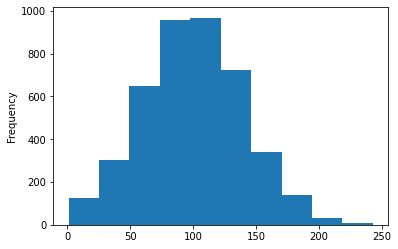

In [ ]:
train1.account_length.plot.hist()

In [ ]:
import pandas as pd
import folium
df = train1[["state","churn"]].groupby("state").describe()
df

churn                
      count unique top freq
state                      
AK       61      2   0   57
AL      101      2   0   88
AR       71      2   0   60
AZ       77      2   0   70
CA       39      2   0   29
CO       80      2   0   71
CT       88      2   0   73
DC       72      2   0   64
DE       80      2   0   67
FL       76      2   0   67
GA       64      2   0   57
HI       77      2   0   73
IA       62      2   0   55
ID      106      2   0   94
IL       79      2   0   73
IN       83      2   0   70
KS       87      2   0   72
KY       85      2   0   73
LA       69      2   0   62
MA       89      2   0   75
MD       86      2   0   67
ME       89      2   0   73
MI       87      2   0   72
MN      108      2   0   89
MO       80      2   0   70
MS       82      2   0   67
MT       80      2   0   63
NC       80      2   0   73
ND       67      2   0   61
NE       73      2   0   68
NH       78      2   0   68
NJ       96      2   0   70
NM       78      2   0   68
NV       83      2   0   66
NY       96      2   0   80
OH       95      2   0   83
OK       78      2   0   62
OR       99      2   0   84
PA       67      2   0   59
RI       87      2   0   81
SC       72      2   0   58
SD       75      2   0   64
TN       79      2   0   67
TX       98      2   0   79
UT       97      2   0   85
VA      100      2   0   95
VT       86      2   0   76
WA       80      2   0   62
WI       94      2   0   87
WV      139      2   0  120
WY       95      2   0   85

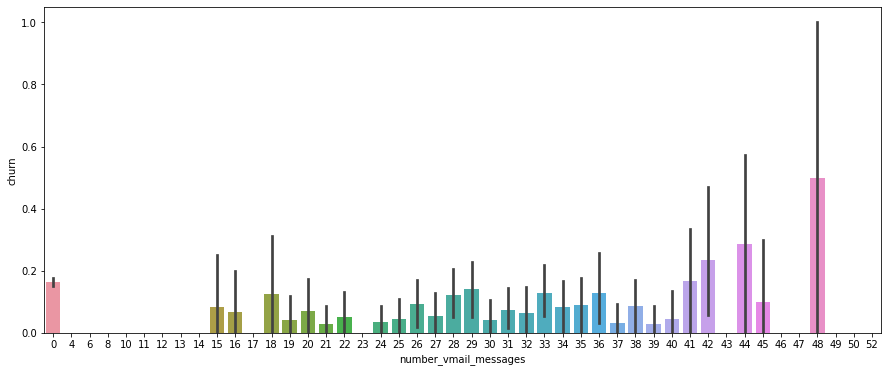

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="number_vmail_messages",y="churn",data=train1)

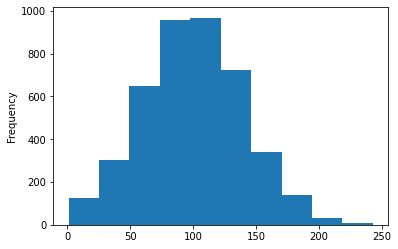

In [ ]:
# check distribution_of_account_length
train.account_length.plot.hist()

In [ ]:
#Change month to year
train["account_length_year"] = train["account_length"]/12
train.drop(axis=1,columns = "account_length",inplace=True)

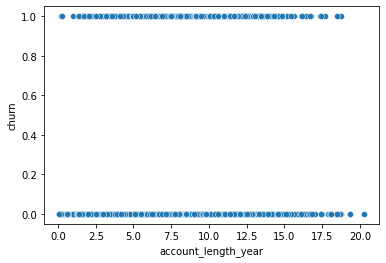

In [ ]:
sns.scatterplot(x="account_length_year",y="churn",data=train)

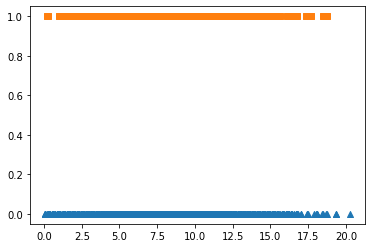

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = train["account_length_year"]
y = train["churn"]
churn = y.copy()

fig, ax = plt.subplots()

ax.scatter(x[churn==0],y[churn==0], marker='^')
ax.scatter(x[churn==1],y[churn==1], marker='s')

plt.show()


In [ ]:
test.area_code.value_counts()

area_code_415    387
area_code_510    190
area_code_408    173
Name: area_code, dtype: int64

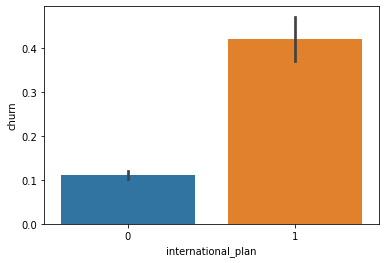

In [ ]:
sns.barplot(x="international_plan",y="churn",data=train)

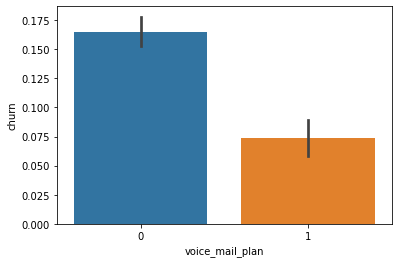

In [ ]:
sns.barplot(x="voice_mail_plan",y="churn",data=train)

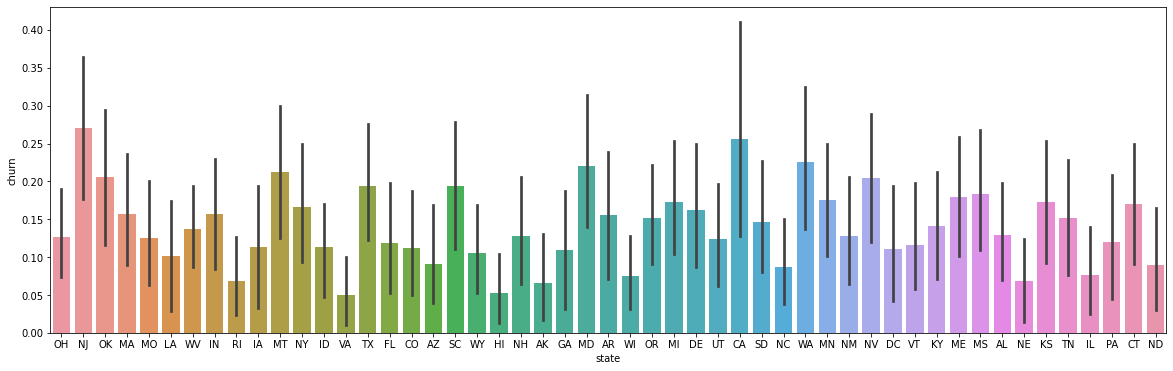

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(y="churn",x="state",data=train)

In [ ]:
A1 = train.groupby("state")["churn"]
data1 = A1.describe()

In [ ]:
data1["churn_rate"] = round(((data1["count"]-data1["freq"])/data1["count"])*100,2)
data1.sort_values(by="churn_rate",ascending=False,inplace=True)

In [ ]:
data1.index

Index(['NJ', 'CA', 'WA', 'MD', 'MT', 'OK', 'NV', 'SC', 'TX', 'MS', 'ME', 'MN',
       'MI', 'KS', 'CT', 'NY', 'DE', 'MA', 'IN', 'AR', 'TN', 'OR', 'SD', 'KY',
       'WV', 'AL', 'NH', 'NM', 'OH', 'MO', 'UT', 'PA', 'FL', 'VT', 'ID', 'IA',
       'CO', 'DC', 'GA', 'WY', 'LA', 'AZ', 'ND', 'NC', 'IL', 'WI', 'RI', 'NE',
       'AK', 'HI', 'VA'],
      dtype='object', name='state')

In [ ]:
state = data1.index
state

Index(['NJ', 'CA', 'WA', 'MD', 'MT', 'OK', 'NV', 'SC', 'TX', 'MS', 'ME', 'MN',
       'MI', 'KS', 'CT', 'NY', 'DE', 'MA', 'IN', 'AR', 'TN', 'OR', 'SD', 'KY',
       'WV', 'AL', 'NH', 'NM', 'OH', 'MO', 'UT', 'PA', 'FL', 'VT', 'ID', 'IA',
       'CO', 'DC', 'GA', 'WY', 'LA', 'AZ', 'ND', 'NC', 'IL', 'WI', 'RI', 'NE',
       'AK', 'HI', 'VA'],
      dtype='object', name='state')

In [ ]:
data1["state"] = state

Text(0, 0.5, 'Churn_percentage')

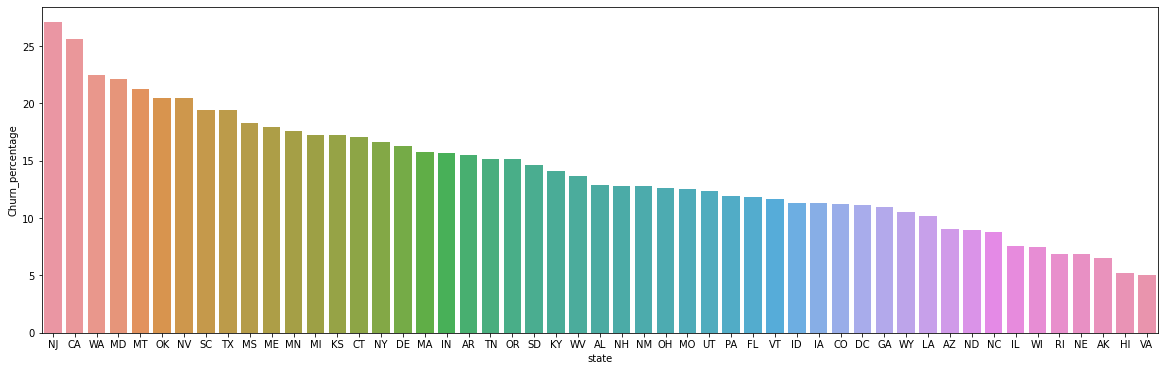

In [ ]:
#check the important of state and churn 
plt.figure(figsize=(20,6))
sns.barplot(y="churn_rate",x="state",data=data1)
plt.ylabel("Churn_percentage")

In [ ]:
lat_long = [[40.0583,74.4057],[36.7783,119.4179],[47.7511,120.7401],[39.0458,76.6413],[46.8797,110.3626],[35.0078,97.0929],
            [38.8026,116.4194],[33.8361,81.1637],[31.9686,99.9018],[32.3547,89.3985],[45.2538,69.4455],[46.7296,94.6859],
            [39.0119,98.4842],[44.3148,85.6024],[41.6032,73.0877],[40.7128,74.0060],[38.91,75.5277],[42.4072,71.3924],
            [37.0902,95.7129],[35.2010,91.8318],[35.5175,86.5804],[37.0902,95.7129],[43.9695,99.9018],[37.8393,84.2700],
            [38.5976,80.4549],[32.3182,86.9023],[43.1939,71.5724],[34.5199,105.8701],[40.4173,82.9071],[37.9643,91.8318],
            [39.3210,111.0937],[41.2033,77.1945],[27.6648,81.5158],[44.5588,72.5778],[44.0682,114.7420],[41.8780,93.0977],
            [39.5501,105.7821],[38.9072,77.0369],[32.1656,82.9001],[43.0760,107.2903],[34.0522,118.2437],[34.0489,111.0937],
            [47.5515,101.0020],[35.7596,79.0193],[40.6331,89.3985],[43.7844,88.7879],[41.5801,71.4774],[41.4925,99.9018],
            [64.2008,149.4937],[37.0902,95.7129],[37.4316,78.6569]]

In [ ]:
lat_long1 = np.array(lat_long)

In [ ]:
data1

,count,unique,top,freq,churn_rate,state
state,,,,,,
NJ,96,2,0,70,27.08,NJ
CA,39,2,0,29,25.64,CA
WA,80,2,0,62,22.50,WA
MD,86,2,0,67,22.09,MD
MT,80,2,0,63,21.25,MT
OK,78,2,0,62,20.51,OK
NV,83,2,0,66,20.48,NV
SC,72,2,0,58,19.44,SC
TX,98,2,0,79,19.39,TX


In [ ]:
df4 = pd.DataFrame(lat_long1,columns=["latitude","longtitude"],index=data1.index)
data2 = pd.concat([data1,df4],axis=1)

In [ ]:
data2

,count,unique,top,freq,churn_rate,state,latitude,longtitude
state,,,,,,,,
NJ,96,2,0,70,27.08,NJ,40.0583,74.4057
CA,39,2,0,29,25.64,CA,36.7783,119.4179
WA,80,2,0,62,22.50,WA,47.7511,120.7401
MD,86,2,0,67,22.09,MD,39.0458,76.6413
MT,80,2,0,63,21.25,MT,46.8797,110.3626
OK,78,2,0,62,20.51,OK,35.0078,97.0929
NV,83,2,0,66,20.48,NV,38.8026,116.4194
SC,72,2,0,58,19.44,SC,33.8361,81.1637
TX,98,2,0,79,19.39,TX,31.9686,99.9018


In [ ]:
from plotly import subplots
import plotly.graph_objects as go

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=data2['state'], # Spatial coordinates
    z = data2['churn_rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`,    
    colorscale = 'Reds',
    colorbar_title = "Churn rate percentage",
    ))

fig.update_layout(
    title_text = 'Churn rate map for Churn percentage',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

In [ ]:
data2

,count,unique,top,freq,churn_rate,state,latitude,longtitude
state,,,,,,,,
NJ,96,2,0,70,27.08,NJ,40.0583,74.4057
CA,39,2,0,29,25.64,CA,36.7783,119.4179
WA,80,2,0,62,22.50,WA,47.7511,120.7401
MD,86,2,0,67,22.09,MD,39.0458,76.6413
MT,80,2,0,63,21.25,MT,46.8797,110.3626
OK,78,2,0,62,20.51,OK,35.0078,97.0929
NV,83,2,0,66,20.48,NV,38.8026,116.4194
SC,72,2,0,58,19.44,SC,33.8361,81.1637
TX,98,2,0,79,19.39,TX,31.9686,99.9018


In [ ]:
#Type check from dangerous
dict_churn_dangerous = {5:["NJ","CA","WA","MD","MT","OK","NV"],4:["SC","TX","MS","ME","MN","MI","KS","CT","NY","DE"],
                        3:["MA","IN","AR","TN","OR","SD","KY"],2:["WV","AL","NH","NM","OH","MO","UT","PA","FL","VT","ID","IA","CO",
                        "DC","GA","WY","LA"],1:["AZ","ND","NC","IL","WI"],0:["RI","NE","AK","HI","VA"]}


In [ ]:
trainz = train[["state"]]
trainz

,state
0,OH
1,NJ
2,OH
3,OK
4,MA
...,...
4245,MT
4246,WV
4247,NC
4248,HI


In [ ]:
data2

,count,unique,top,freq,churn_rate,state,latitude,longtitude
state,,,,,,,,
NJ,96,2,0,70,27.08,NJ,40.0583,74.4057
CA,39,2,0,29,25.64,CA,36.7783,119.4179
WA,80,2,0,62,22.50,WA,47.7511,120.7401
MD,86,2,0,67,22.09,MD,39.0458,76.6413
MT,80,2,0,63,21.25,MT,46.8797,110.3626
OK,78,2,0,62,20.51,OK,35.0078,97.0929
NV,83,2,0,66,20.48,NV,38.8026,116.4194
SC,72,2,0,58,19.44,SC,33.8361,81.1637
TX,98,2,0,79,19.39,TX,31.9686,99.9018


In [ ]:
train1["account_length_year"] = round(train1["account_length"]/12,2)

In [ ]:
train1

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510,account_length_year
0,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0,8.92
1,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0,11.42
2,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0,7.00
3,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0,6.25
4,MA,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0,10.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0,0.0,1.0,0.0,6.92
4246,WV,73,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0,1.0,0.0,0.0,6.08
4247,NC,75,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0,1.0,0.0,0.0,6.25
4248,HI,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0,1.0,0.0,0.0,4.17


In [ ]:
train1["account_length_year1"] = (train1["account_length_year"] -train1.account_length_year.mean())/train1.account_length_year.std()

In [ ]:
train1["number_vmail_messages1"] = (train1["number_vmail_messages"] -train1.number_vmail_messages.mean())/train1.number_vmail_messages.std()

In [ ]:
train1.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510,account_length_year,account_length_year1,number_vmail_messages1
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4.250000e+03,4.250000e+03
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.255529,0.496000,0.248471,8.353019,-1.222591e-15,2.630575e-16
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.436210,0.500043,0.432177,3.308285,1.000000e+00,1.000000e+00
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,-2.500697e+00,-5.678446e-01
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000,6.080000,-6.870687e-01,-5.678446e-01
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000,0.000000,8.330000,-6.957933e-03,-5.678446e-01
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,1.000000,1.000000,0.000000,10.580000,6.731528e-01,6.226420e-01
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,1.000000,20.250000,3.596118e+00,3.301237e+00


In [ ]:
train1.drop("number_vmail_messages",axis=1,inplace=True)

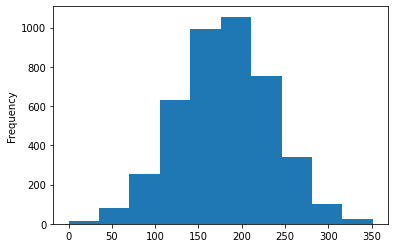

In [ ]:
train1["total_day_minutes"].plot.hist()

In [ ]:
train1["total_day_minutes1"] = (train1["total_day_minutes"] -train1.total_day_minutes.mean())/train1.total_day_minutes.std()

In [ ]:
train1 = train1.iloc[:,:21]
train1

,state,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,OH,107,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
1,NJ,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
2,OH,84,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
3,OK,75,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
4,MA,121,0,1,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0,0.0,1.0,0.0
4246,WV,73,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0,1.0,0.0,0.0
4247,NC,75,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0,1.0,0.0,0.0
4248,HI,50,0,1,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0,1.0,0.0,0.0


#Dive Deep through visualization

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   international_plan             4250 non-null   object 
 3   voice_mail_plan                4250 non-null   object 
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   int64  
 6   total_day_charge               4250 non-null   float64
 7   total_eve_minutes              4250 non-null   float64
 8   total_eve_calls                4250 non-null   int64  
 9   total_eve_charge               4250 non-null   float64
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_night_charge             4250 non-null   f

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   international_plan             4250 non-null   object 
 3   voice_mail_plan                4250 non-null   object 
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   int64  
 6   total_day_charge               4250 non-null   float64
 7   total_eve_minutes              4250 non-null   float64
 8   total_eve_calls                4250 non-null   int64  
 9   total_eve_charge               4250 non-null   float64
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_night_charge             4250 non-null   f

In [ ]:
train2 = train1.iloc[:,1:]
train2

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,107,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
1,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
2,84,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
3,75,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
4,121,0,1,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0,0.0,1.0,0.0
4246,73,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0,1.0,0.0,0.0
4247,75,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0,1.0,0.0,0.0
4248,50,0,1,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0,1.0,0.0,0.0


In [ ]:
check_skewness = train1.skew(axis=0)
check_skewness

account_length                   0.122327
international_plan               2.800109
voice_mail_plan                  1.084960
total_day_minutes               -0.006910
total_day_calls                 -0.085812
total_day_charge                -0.006913
total_eve_minutes               -0.030415
total_eve_calls                 -0.020812
total_eve_charge                -0.030388
total_night_minutes              0.008491
total_night_calls                0.005273
total_night_charge               0.008445
total_intl_minutes              -0.241360
total_intl_calls                 1.360122
total_intl_charge               -0.241671
number_customer_service_calls    1.082692
churn                            2.067314
area_code_408                    1.121413
area_code_415                    0.016006
area_code_510                    1.164559
dtype: float64

In [ ]:
train1

,state,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,OH,107,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
1,NJ,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
2,OH,84,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
3,OK,75,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
4,MA,121,0,1,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0,0.0,1.0,0.0
4246,WV,73,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0,1.0,0.0,0.0
4247,NC,75,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0,1.0,0.0,0.0
4248,HI,50,0,1,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0,1.0,0.0,0.0


In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   object 
 2   voice_mail_plan                4250 non-null   object 
 3   total_day_minutes              4250 non-null   float64
 4   total_day_calls                4250 non-null   int64  
 5   total_day_charge               4250 non-null   float64
 6   total_eve_minutes              4250 non-null   float64
 7   total_eve_calls                4250 non-null   int64  
 8   total_eve_charge               4250 non-null   float64
 9   total_night_minutes            4250 non-null   float64
 10  total_night_calls              4250 non-null   int64  
 11  total_night_charge             4250 non-null   float64
 12  total_intl_minutes             4250 non-null   f

In [ ]:
train2

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,107,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
1,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
2,84,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
3,75,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
4,121,0,1,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0,0.0,1.0,0.0
4246,73,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0,1.0,0.0,0.0
4247,75,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0,1.0,0.0,0.0
4248,50,0,1,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0,1.0,0.0,0.0


In [ ]:
train2 = train2.astype({
    "international_plan":float,
    "voice_mail_plan":float,
    "churn":float})

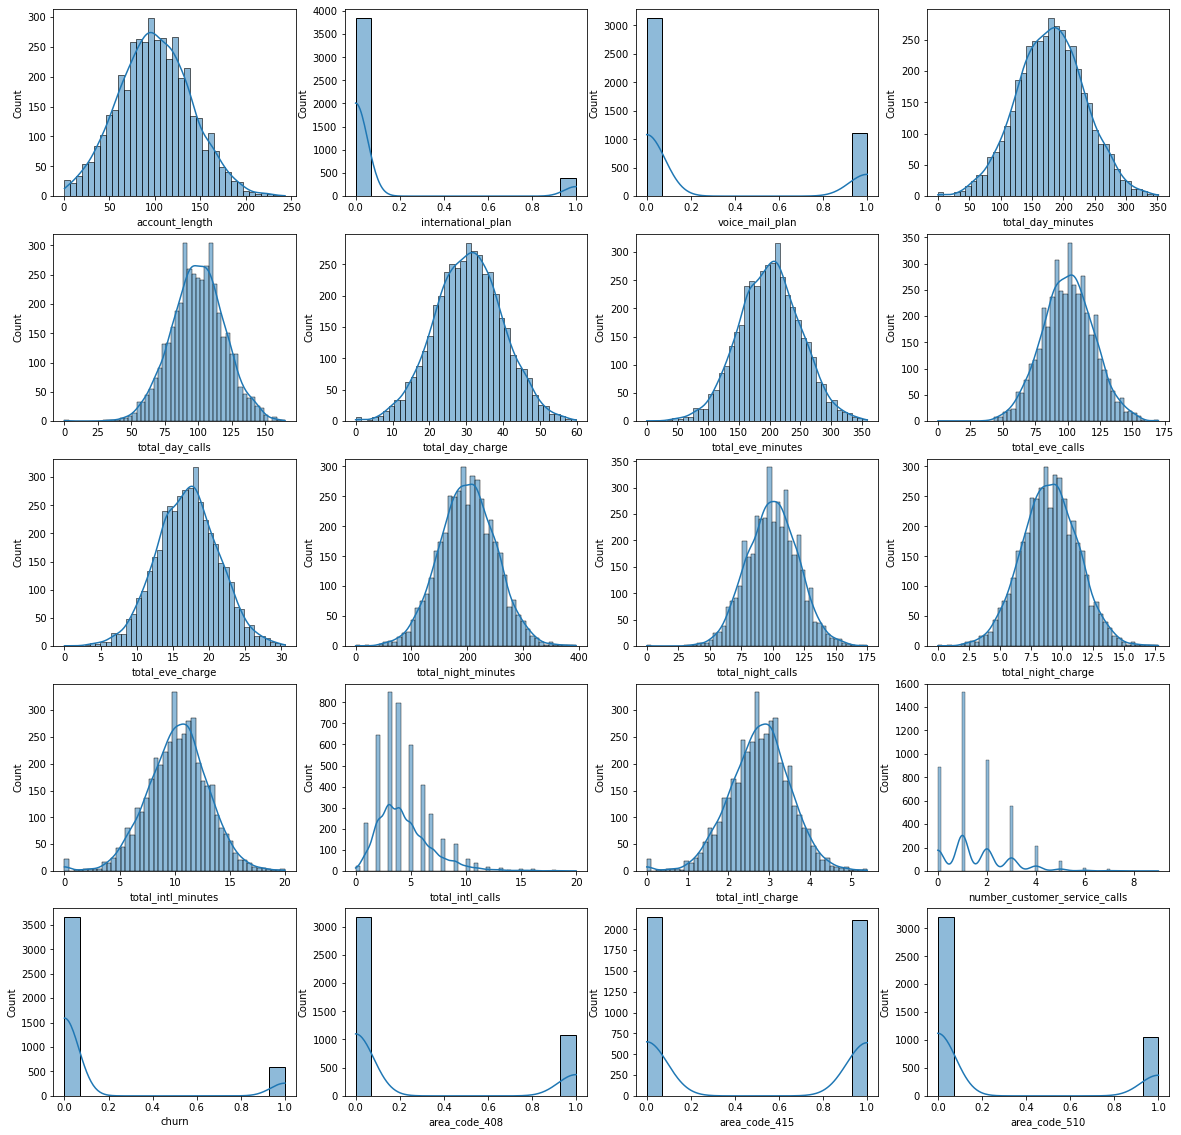

In [ ]:
# Check the distribution of the 
f, axes = plt.subplots(5, 4, figsize=(20, 20))
A = train2.columns
start = 0 
for i in range(5):
  for j in range(4):
    sns.histplot(train2[A[start]],ax=axes[i,j],kde=True)
    start += 1 

In [ ]:
A1 = train1.describe().columns
list_col = []
for j in range(len(A1)):
  if j in [2,3,4,5,6,7,8,9,10,11,12,13,19]:
    list_col.append(A1[j])
list_col

['total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [ ]:
data_transform = train1[list_col]

In [ ]:
data_transform1 = (data_transform-data_transform.mean())/data_transform.std()

In [ ]:
data_transform1.describe()

,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03
mean,1.588141e-16,-1.447010e-14,-2.518717e-15,2.044443e-16,1.737956e-15,-9.359023e-15,2.542615e-16,-1.770696e-14,8.967467e-16,5.015596e-18,1.785983e-14,4.532322e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.032906e+00,-3.337439e+00,-3.983599e+00,-5.031821e+00,-3.983650e+00,-3.982398e+00,-4.968817e+00,-3.982437e+00,-3.715831e+00,-1.797088e+00,-3.716638e+00,-1.188820e+00
25%,-6.502147e-01,-6.839051e-01,-6.815768e-01,-6.618485e-01,-6.818935e-01,-6.613810e-01,-6.887661e-01,-6.625965e-01,-6.362340e-01,-5.790958e-01,-6.302355e-01,-4.262960e-01
50%,4.670129e-03,3.846360e-03,1.046964e-02,-8.864042e-03,1.053290e-02,-1.546710e-03,7.986305e-03,-1.717519e-03,1.591587e-02,-1.730982e-01,1.388329e-02,-4.262960e-01
75%,6.595550e-01,6.649155e-01,6.686849e-01,6.943500e-01,6.678405e-01,6.786437e-01,6.549707e-01,6.779176e-01,6.318352e-01,6.388968e-01,6.311638e-01,3.362284e-01
max,3.279095e+00,3.170879e+00,3.166719e+00,3.507206e+00,3.166546e+00,3.862133e+00,3.740589e+00,3.859846e+00,3.530279e+00,6.322862e+00,3.529698e+00,5.673899e+00


In [ ]:
train3 = train1.copy()

In [ ]:
train3.drop(columns=list_col,inplace=True)
train3[list_col] = data_transform1

In [ ]:
train3

,state,account_length,international_plan,voice_mail_plan,total_day_minutes,churn,area_code_408,area_code_415,area_code_510,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,0,1,161.6,0,0.0,1.0,0.0,1.163313,-0.345747,-0.093014,0.141825,-0.092482,1.069877,0.157290,1.070694,1.247755,-0.579096,1.248444,-0.426296
1,NJ,137,0,0,243.4,0,0.0,1.0,0.0,0.709931,1.169158,-1.571635,0.493432,-1.572156,-0.753232,0.207058,-0.751964,0.704296,0.232899,0.698260,-1.188820
2,OH,84,1,0,299.4,0,1.0,0.0,0.0,-1.456227,2.205958,-2.751746,-0.611619,-2.752149,-0.072048,-0.539462,-0.072329,-1.324614,1.044894,-1.328031,0.336228
3,OK,75,1,0,166.7,0,0.0,1.0,0.0,0.659555,-0.250997,-1.032326,1.096187,-1.031326,-0.270644,1.053115,-0.270924,-0.056545,-0.579096,-0.053212,1.098753
4,MA,121,0,1,218.2,0,0.0,0.0,1.0,-0.599839,0.701944,2.951791,0.392973,2.951150,0.239747,0.903811,0.241009,-0.998539,1.044894,-0.992552,1.098753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,0,0,188.3,0,0.0,1.0,0.0,-1.506603,0.148693,0.868189,-0.611619,0.867433,0.261593,-1.037142,0.263075,0.015916,0.638897,0.013883,-1.188820
4246,WV,73,0,0,177.9,0,1.0,0.0,0.0,-0.549463,-0.044073,-1.372628,-0.912996,-1.373149,-0.284546,-0.539462,-0.284163,0.450682,0.638897,0.456715,1.098753
4247,NC,75,0,0,170.7,0,1.0,0.0,0.0,0.055046,-0.176940,-0.140776,1.297105,-0.141649,-1.418527,0.207058,-1.418360,-1.215923,1.044894,-1.220678,-0.426296
4248,HI,50,0,1,235.7,0,1.0,0.0,0.0,1.364816,1.026489,0.454255,1.297105,0.455372,1.925825,0.804275,1.926857,-0.129006,0.232899,-0.133727,0.336228


In [ ]:
b = train3.iloc[:,1:]

In [ ]:
b

,account_length,international_plan,voice_mail_plan,total_day_minutes,churn,area_code_408,area_code_415,area_code_510,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,0,1,161.6,0,0.0,1.0,0.0,1.163313,-0.345747,-0.093014,0.141825,-0.092482,1.069877,0.157290,1.070694,1.247755,-0.579096,1.248444,-0.426296
1,137,0,0,243.4,0,0.0,1.0,0.0,0.709931,1.169158,-1.571635,0.493432,-1.572156,-0.753232,0.207058,-0.751964,0.704296,0.232899,0.698260,-1.188820
2,84,1,0,299.4,0,1.0,0.0,0.0,-1.456227,2.205958,-2.751746,-0.611619,-2.752149,-0.072048,-0.539462,-0.072329,-1.324614,1.044894,-1.328031,0.336228
3,75,1,0,166.7,0,0.0,1.0,0.0,0.659555,-0.250997,-1.032326,1.096187,-1.031326,-0.270644,1.053115,-0.270924,-0.056545,-0.579096,-0.053212,1.098753
4,121,0,1,218.2,0,0.0,0.0,1.0,-0.599839,0.701944,2.951791,0.392973,2.951150,0.239747,0.903811,0.241009,-0.998539,1.044894,-0.992552,1.098753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,188.3,0,0.0,1.0,0.0,-1.506603,0.148693,0.868189,-0.611619,0.867433,0.261593,-1.037142,0.263075,0.015916,0.638897,0.013883,-1.188820
4246,73,0,0,177.9,0,1.0,0.0,0.0,-0.549463,-0.044073,-1.372628,-0.912996,-1.373149,-0.284546,-0.539462,-0.284163,0.450682,0.638897,0.456715,1.098753
4247,75,0,0,170.7,0,1.0,0.0,0.0,0.055046,-0.176940,-0.140776,1.297105,-0.141649,-1.418527,0.207058,-1.418360,-1.215923,1.044894,-1.220678,-0.426296
4248,50,0,1,235.7,0,1.0,0.0,0.0,1.364816,1.026489,0.454255,1.297105,0.455372,1.925825,0.804275,1.926857,-0.129006,0.232899,-0.133727,0.336228


In [ ]:
train3 = b

In [ ]:
train3 = train3.astype({
    "international_plan":float,
    "voice_mail_plan":float,
    "churn":float})

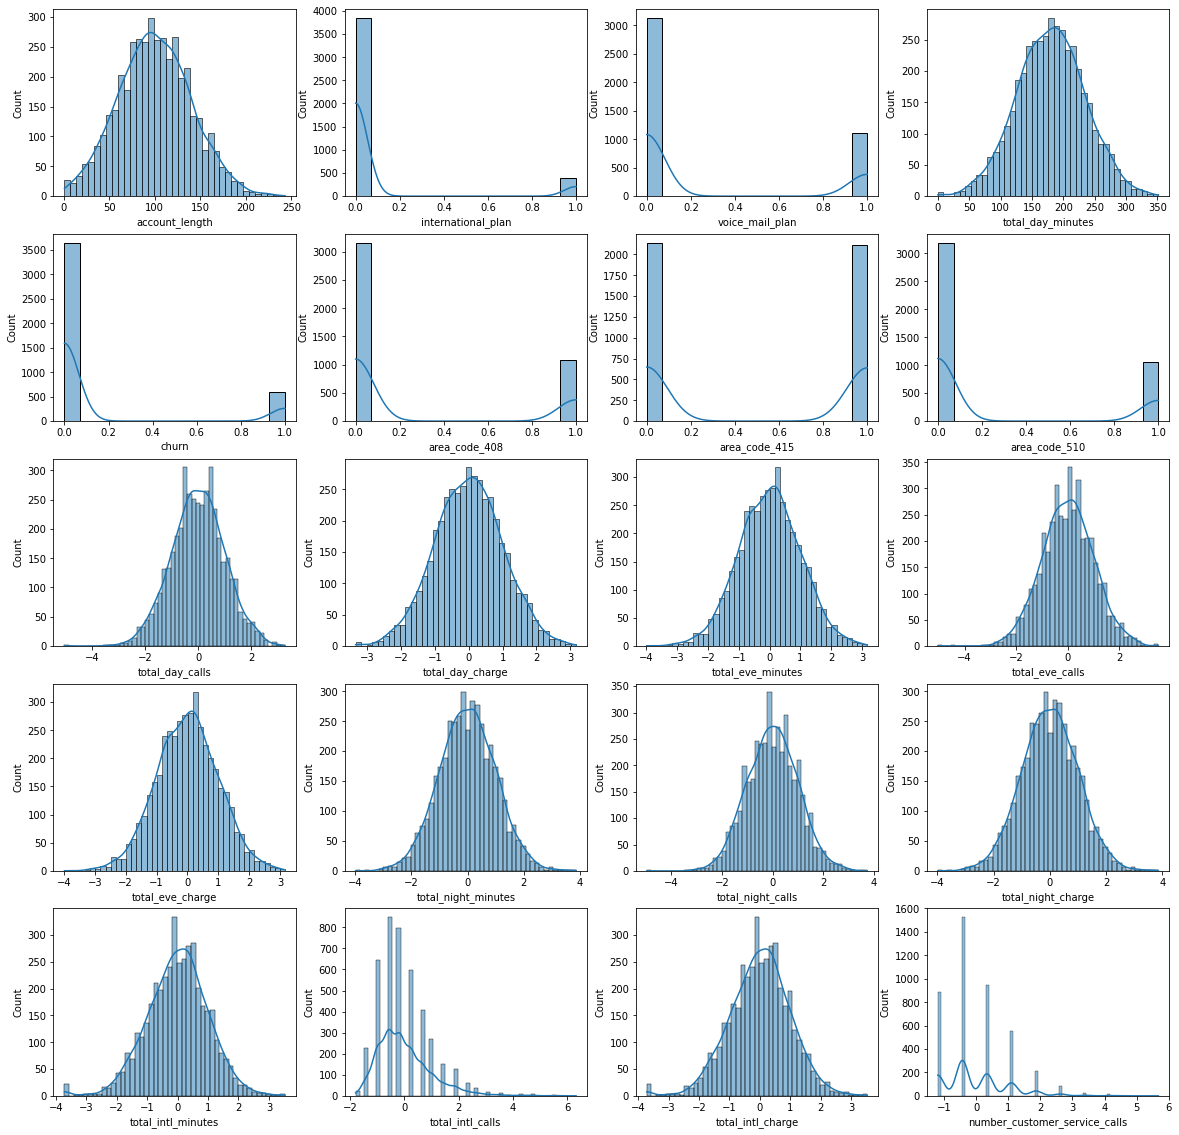

In [ ]:
f, axes = plt.subplots(5, 4, figsize=(20, 20))
A = train3.columns
start = 0 
for i in range(5):
  for j in range(4):
    sns.histplot(train3[A[start]],ax=axes[i,j],kde=True)
    start += 1 

In [ ]:
state = pd.read_csv("train.csv")["state"]
state

0       OH
1       NJ
2       OH
3       OK
4       MA
        ..
4245    MT
4246    WV
4247    NC
4248    HI
4249    VT
Name: state, Length: 4250, dtype: object

In [ ]:
train3["state"] = state

In [ ]:
list1 = []
for i in range(trainz.shape[0]):
  c = False
  for k in range(6):
    b = trainz.iloc[i,0]
    if b in dict_churn_dangerous[k]:
      list1.append(k)
      c = True
train3["state_by_dangerous"] = list1

In [ ]:
train1.corr()

,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
account_length,1.000000,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019400,-0.000438,-0.019074
total_day_minutes,-0.001612,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,-0.020158,0.026162,-0.009924
total_day_calls,0.023002,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,-0.021970,0.051199,-0.037065
total_day_charge,-0.001613,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,-0.020159,0.026167,-0.009928
total_eve_minutes,-0.010326,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.012359,-0.021216,0.012073
total_eve_calls,0.005535,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,0.015348,-0.006856,-0.007559
total_eve_charge,-0.010322,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071,0.012347,-0.021217,0.012086
total_night_minutes,-0.009916,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771,-0.026022,0.018376,0.005004
total_night_calls,-0.001846,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893,-0.020239,0.002841,0.017141
total_night_charge,-0.009942,0.010036,0.002200,0.010040,-0.014031,0.008441,-0.014035,0.999999,0.023798,1.000000,-0.000103,-0.024260,-0.000037,-0.013761,-0.026029,0.018392,0.004992


In [ ]:
X1 = train3[["state"]]

In [ ]:
train3.corr()

,account_length,international_plan,voice_mail_plan,total_day_minutes,churn,area_code_408,area_code_415,area_code_510,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_by_dangerous
account_length,1.000000,0.027050,0.001663,-0.001612,0.019378,0.019400,-0.000438,-0.019074,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,-0.017641
international_plan,0.027050,1.000000,0.000714,0.040059,0.259053,-0.017055,-0.008768,0.027359,0.009776,0.040061,0.023484,-0.003004,0.023479,-0.020694,0.007153,-0.020694,0.023815,0.006956,0.023799,-0.008881,0.002328
voice_mail_plan,0.001663,0.000714,1.000000,-0.000653,-0.114643,-0.006319,0.013328,-0.009043,-0.010004,-0.000658,0.011982,0.000263,0.011989,0.017884,0.007872,0.017875,0.008098,-0.005674,0.008129,-0.021504,-0.017304
total_day_minutes,-0.001612,0.040059,-0.000653,1.000000,0.215272,-0.020158,0.026162,-0.009924,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.029334
churn,0.019378,0.259053,-0.114643,0.215272,1.000000,-0.001251,-0.013004,0.016309,0.011640,0.215263,0.078855,-0.006817,0.078852,0.046647,-0.012699,0.046641,0.055186,-0.034334,0.055177,0.221220,0.137170
area_code_408,0.019400,-0.017055,-0.006319,-0.020158,-0.001251,1.000000,-0.581196,-0.336869,-0.021970,-0.020159,0.012359,0.015348,0.012347,-0.026022,-0.020239,-0.026029,-0.031021,-0.008985,-0.030911,0.005703,-0.005295
area_code_415,-0.000438,-0.008768,0.013328,0.026162,-0.013004,-0.581196,1.000000,-0.570414,0.051199,0.026167,-0.021216,-0.006856,-0.021217,0.018376,0.002841,0.018392,0.034753,0.025653,0.034737,-0.025659,-0.007321
area_code_510,-0.019074,0.027359,-0.009043,-0.009924,0.016309,-0.336869,-0.570414,1.000000,-0.037065,-0.009928,0.012073,-0.007559,0.012086,0.005004,0.017141,0.004992,-0.008900,-0.020612,-0.008992,0.023932,0.013816
total_day_calls,0.023002,0.009776,-0.010004,0.000747,0.011640,-0.021970,0.051199,-0.037065,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,-0.009198
total_day_charge,-0.001613,0.040061,-0.000658,1.000000,0.215263,-0.020159,0.026167,-0.009928,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.029333


In [ ]:
dict_churn_dangerous = {5:["NJ","CA","WA","MD","MT","OK","NV"],4:["SC","TX","MS","ME","MN","MI","KS","CT","NY","DE"],
                        3:["MA","IN","AR","TN","OR","SD","KY"],2:["WV","AL","NH","NM","OH","MO","UT","PA","FL","VT","ID","IA","CO",
                        "DC","GA","WY","LA"],1:["AZ","ND","NC","IL","WI"],0:["RI","NE","AK","HI","VA"]}
train3.drop("state",axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train3.corr())

In [ ]:
train3.corr()["churn"]

account_length                   0.019378
international_plan               0.259053
voice_mail_plan                 -0.114643
total_day_minutes                0.215272
churn                            1.000000
area_code_408                   -0.001251
area_code_415                   -0.013004
area_code_510                    0.016309
total_day_calls                  0.011640
total_day_charge                 0.215263
total_eve_minutes                0.078855
total_eve_calls                 -0.006817
total_eve_charge                 0.078852
total_night_minutes              0.046647
total_night_calls               -0.012699
total_night_charge               0.046641
total_intl_minutes               0.055186
total_intl_calls                -0.034334
total_intl_charge                0.055177
number_customer_service_calls    0.221220
state_by_dangerous               0.137170
Name: churn, dtype: float64

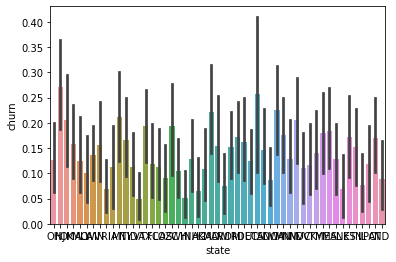

In [ ]:
sns.barplot(x="state",y="churn",data=train1)

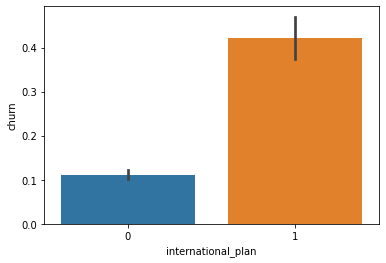

In [ ]:
sns.barplot(x="international_plan",y="churn",data=train1)

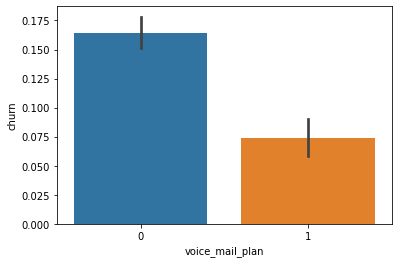

In [ ]:
sns.barplot(x="voice_mail_plan",y="churn",data=train1)

In [ ]:
train1.info()

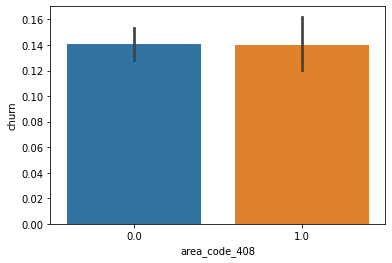

In [ ]:
sns.barplot(x="area_code_408",y="churn",data=train1)

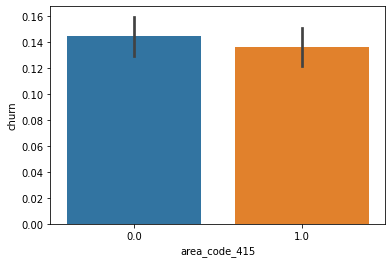

In [ ]:
sns.barplot(x="area_code_415",y="churn",data=train1)

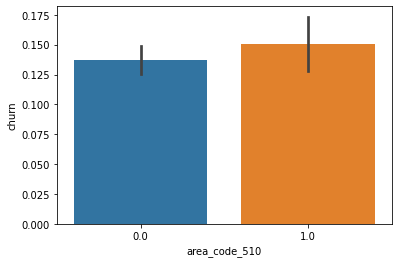

In [ ]:
sns.barplot(x="area_code_510",y="churn",data=train1)

In [ ]:
y_train = train1["churn"]
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 4250, dtype: object

In [ ]:
train_y = y_train

In [ ]:
train1

,state,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,OH,107,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
1,NJ,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
2,OH,84,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
3,OK,75,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
4,MA,121,0,1,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0,0.0,1.0,0.0
4246,WV,73,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0,1.0,0.0,0.0
4247,NC,75,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0,1.0,0.0,0.0
4248,HI,50,0,1,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0,1.0,0.0,0.0


In [ ]:
final_trainx = train3
final_trainy = train1["churn"]

In [ ]:
train1.as

In [ ]:
final_trainx.drop("state",axis=1,inplace=True)

KeyError: ignored

In [ ]:
final_trainx.drop("churn",axis=1,inplace=True)

In [ ]:
final_trainx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   float64
 2   voice_mail_plan                4250 non-null   float64
 3   total_day_minutes              4250 non-null   float64
 4   area_code_408                  4250 non-null   float64
 5   area_code_415                  4250 non-null   float64
 6   area_code_510                  4250 non-null   float64
 7   total_day_calls                4250 non-null   float64
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   float64
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
final_trainy = final_trainy.astype({"churn":float})

In [ ]:
final_trainy

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4245    0.0
4246    0.0
4247    0.0
4248    0.0
4249    0.0
Name: churn, Length: 4250, dtype: float64

In [ ]:
final_trainx

,account_length,international_plan,voice_mail_plan,total_day_minutes,area_code_408,area_code_415,area_code_510,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_by_dangerous
0,0.170379,0.0,1.0,-0.345469,0.0,1.0,0.0,1.163313,-0.345747,-0.093014,0.141825,-0.092482,1.069877,0.157290,1.070694,1.247755,-0.579096,1.248444,-0.426296,2
1,0.926077,0.0,0.0,1.168999,0.0,1.0,0.0,0.709931,1.169158,-1.571635,0.493432,-1.572156,-0.753232,0.207058,-0.751964,0.704296,0.232899,0.698260,-1.188820,5
2,-0.408990,1.0,0.0,2.205798,1.0,0.0,0.0,-1.456227,2.205958,-2.751746,-0.611619,-2.752149,-0.072048,-0.539462,-0.072329,-1.324614,1.044894,-1.328031,0.336228,2
3,-0.635699,1.0,0.0,-0.251046,0.0,1.0,0.0,0.659555,-0.250997,-1.032326,1.096187,-1.031326,-0.270644,1.053115,-0.270924,-0.056545,-0.579096,-0.053212,1.098753,5
4,0.523038,0.0,1.0,0.702439,0.0,0.0,1.0,-0.599839,0.701944,2.951791,0.392973,2.951150,0.239747,0.903811,0.241009,-0.998539,1.044894,-0.992552,1.098753,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.434180,0.0,0.0,0.148862,0.0,1.0,0.0,-1.506603,0.148693,0.868189,-0.611619,0.867433,0.261593,-1.037142,0.263075,0.015916,0.638897,0.013883,-1.188820,5
4246,-0.686079,0.0,0.0,-0.043686,1.0,0.0,0.0,-0.549463,-0.044073,-1.372628,-0.912996,-1.373149,-0.284546,-0.539462,-0.284163,0.450682,0.638897,0.456715,1.098753,2
4247,-0.635699,0.0,0.0,-0.176989,1.0,0.0,0.0,0.055046,-0.176940,-0.140776,1.297105,-0.141649,-1.418527,0.207058,-1.418360,-1.215923,1.044894,-1.220678,-0.426296,1
4248,-1.265447,0.0,1.0,1.026439,1.0,0.0,0.0,1.364816,1.026489,0.454255,1.297105,0.455372,1.925825,0.804275,1.926857,-0.129006,0.232899,-0.133727,0.336228,0


In [ ]:
final_trainx["account_length"] = (final_trainx["account_length"]-final_trainx["account_length"].mean())/final_trainx["account_length"].std()

In [ ]:
final_trainx["total_day_minutes"] = (final_trainx["total_day_minutes"]-final_trainx["total_day_minutes"].mean())/final_trainx["total_day_minutes"].std()

In [ ]:
trainq = pd.read_csv("train.csv")
trainq

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
final_trainx["number_vmail_messages"] = trainq["number_vmail_messages"]/trainq["number_vmail_messages"].max()

In [ ]:
final_trainx

,account_length,international_plan,voice_mail_plan,total_day_minutes,area_code_408,area_code_415,area_code_510,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_by_dangerous,number_vmail_messages
0,0.170379,0.0,1.0,-0.345469,0.0,1.0,0.0,1.163313,-0.345747,-0.093014,0.141825,-0.092482,1.069877,0.157290,1.070694,1.247755,-0.579096,1.248444,-0.426296,2,0.500000
1,0.926077,0.0,0.0,1.168999,0.0,1.0,0.0,0.709931,1.169158,-1.571635,0.493432,-1.572156,-0.753232,0.207058,-0.751964,0.704296,0.232899,0.698260,-1.188820,5,0.000000
2,-0.408990,1.0,0.0,2.205798,1.0,0.0,0.0,-1.456227,2.205958,-2.751746,-0.611619,-2.752149,-0.072048,-0.539462,-0.072329,-1.324614,1.044894,-1.328031,0.336228,2,0.000000
3,-0.635699,1.0,0.0,-0.251046,0.0,1.0,0.0,0.659555,-0.250997,-1.032326,1.096187,-1.031326,-0.270644,1.053115,-0.270924,-0.056545,-0.579096,-0.053212,1.098753,5,0.000000
4,0.523038,0.0,1.0,0.702439,0.0,0.0,1.0,-0.599839,0.701944,2.951791,0.392973,2.951150,0.239747,0.903811,0.241009,-0.998539,1.044894,-0.992552,1.098753,3,0.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.434180,0.0,0.0,0.148862,0.0,1.0,0.0,-1.506603,0.148693,0.868189,-0.611619,0.867433,0.261593,-1.037142,0.263075,0.015916,0.638897,0.013883,-1.188820,5,0.000000
4246,-0.686079,0.0,0.0,-0.043686,1.0,0.0,0.0,-0.549463,-0.044073,-1.372628,-0.912996,-1.373149,-0.284546,-0.539462,-0.284163,0.450682,0.638897,0.456715,1.098753,2,0.000000
4247,-0.635699,0.0,0.0,-0.176989,1.0,0.0,0.0,0.055046,-0.176940,-0.140776,1.297105,-0.141649,-1.418527,0.207058,-1.418360,-1.215923,1.044894,-1.220678,-0.426296,1,0.000000
4248,-1.265447,0.0,1.0,1.026439,1.0,0.0,0.0,1.364816,1.026489,0.454255,1.297105,0.455372,1.925825,0.804275,1.926857,-0.129006,0.232899,-0.133727,0.336228,0,0.769231


In [ ]:
final_trainx

,account_length,international_plan,voice_mail_plan,total_day_minutes,area_code_408,area_code_415,area_code_510,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_by_dangerous,number_vmail_messages
0,0.170379,0.0,1.0,-0.345469,0.0,1.0,0.0,1.163313,-0.345747,-0.093014,0.141825,-0.092482,1.069877,0.157290,1.070694,1.247755,-0.579096,1.248444,-0.426296,2,0.500000
1,0.926077,0.0,0.0,1.168999,0.0,1.0,0.0,0.709931,1.169158,-1.571635,0.493432,-1.572156,-0.753232,0.207058,-0.751964,0.704296,0.232899,0.698260,-1.188820,5,0.000000
2,-0.408990,1.0,0.0,2.205798,1.0,0.0,0.0,-1.456227,2.205958,-2.751746,-0.611619,-2.752149,-0.072048,-0.539462,-0.072329,-1.324614,1.044894,-1.328031,0.336228,2,0.000000
3,-0.635699,1.0,0.0,-0.251046,0.0,1.0,0.0,0.659555,-0.250997,-1.032326,1.096187,-1.031326,-0.270644,1.053115,-0.270924,-0.056545,-0.579096,-0.053212,1.098753,5,0.000000
4,0.523038,0.0,1.0,0.702439,0.0,0.0,1.0,-0.599839,0.701944,2.951791,0.392973,2.951150,0.239747,0.903811,0.241009,-0.998539,1.044894,-0.992552,1.098753,3,0.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.434180,0.0,0.0,0.148862,0.0,1.0,0.0,-1.506603,0.148693,0.868189,-0.611619,0.867433,0.261593,-1.037142,0.263075,0.015916,0.638897,0.013883,-1.188820,5,0.000000
4246,-0.686079,0.0,0.0,-0.043686,1.0,0.0,0.0,-0.549463,-0.044073,-1.372628,-0.912996,-1.373149,-0.284546,-0.539462,-0.284163,0.450682,0.638897,0.456715,1.098753,2,0.000000
4247,-0.635699,0.0,0.0,-0.176989,1.0,0.0,0.0,0.055046,-0.176940,-0.140776,1.297105,-0.141649,-1.418527,0.207058,-1.418360,-1.215923,1.044894,-1.220678,-0.426296,1,0.000000
4248,-1.265447,0.0,1.0,1.026439,1.0,0.0,0.0,1.364816,1.026489,0.454255,1.297105,0.455372,1.925825,0.804275,1.926857,-0.129006,0.232899,-0.133727,0.336228,0,0.769231


#Train-test-split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_trainx,final_trainy, test_size=0.3,shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logis_cv_score = cross_val_score(LogisticRegression(),X_train,y_train, cv=10)

# Training Model

In [ ]:
list_model = []
list_accuracy_score = []

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("=== Confusion Matrix ===")
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(logis_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Logistic_Regression: ", logis_cv_score.mean())
list_accuracy_score.append(logis_cv_score.mean())
list_model.append("Logistic_Regression")

=== Confusion Matrix ===
[[1064   37]
 [ 131   43]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1101
         1.0       0.54      0.25      0.34       174

    accuracy                           0.87      1275
   macro avg       0.71      0.61      0.63      1275
weighted avg       0.84      0.87      0.85      1275



=== All AUC Scores ===
[0.87919463 0.8590604  0.86577181 0.86912752 0.86912752 0.86868687
 0.87205387 0.88888889 0.85858586 0.86195286]


=== Mean AUC Score ===
Mean AUC Score - Logistic_Regression:  0.8692450229362981


In [ ]:
cf_matrix

array([[1064,   37],
       [ 131,   43]])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(LogisticRegression(),X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)

In [ ]:
logistic_cv_score = cross_val_score(LogisticRegression(),X_train,y_train, cv=10)
logistic_cv_score


array([0.87919463, 0.8590604 , 0.86577181, 0.86912752, 0.86912752,
       0.86868687, 0.87205387, 0.88888889, 0.85858586, 0.86195286])

In [ ]:
logistic_cv_score

array([0.87919463, 0.8590604 , 0.86577181, 0.86912752, 0.86912752,
       0.86868687, 0.87205387, 0.88888889, 0.85858586, 0.86195286])

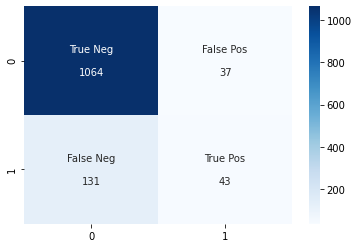

In [ ]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
y_pred = cross_val_predict(RandomForestClassifier(max_depth=4),X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
rfc_cv_score = cross_val_score(RandomForestClassifier(max_depth=4),X_train,y_train, cv=10)
conf_matrix

array([[2542,    9],
       [ 316,  108]])

In [ ]:
rfc_cv_score

array([0.88590604, 0.89597315, 0.89261745, 0.89261745, 0.88255034,
       0.8989899 , 0.88888889, 0.8989899 , 0.89225589, 0.87205387])

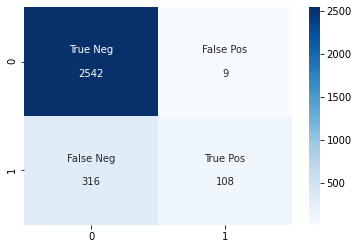

In [ ]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
print(conf_matrix)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print(rfc_cv_score.mean())
print("Mean AUC Score - Random_Forest_Classifier: ", rfc_cv_score.mean())


[[2542    9]
 [ 316  108]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2551
         1.0       0.92      0.25      0.40       424

    accuracy                           0.89      2975
   macro avg       0.91      0.63      0.67      2975
weighted avg       0.89      0.89      0.86      2975



=== All AUC Scores ===
[0.88590604 0.89597315 0.89261745 0.89261745 0.88255034 0.8989899
 0.88888889 0.8989899  0.89225589 0.87205387]


=== Mean AUC Score ===
0.8900842880708654
Mean AUC Score - Random_Forest_Classifier:  0.8900842880708654


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random_forest_regressor: ", rfc_cv_score.mean())
list_accuracy_score.append(rfc_cv_score.mean())
list_model.append("Random_Forest_Classifier")

[[1098    3]
 [ 133   41]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1101
         1.0       0.93      0.24      0.38       174

    accuracy                           0.89      1275
   macro avg       0.91      0.62      0.66      1275
weighted avg       0.90      0.89      0.86      1275



=== All AUC Scores ===
[0.88590604 0.89597315 0.89261745 0.89261745 0.88255034 0.8989899
 0.88888889 0.8989899  0.89225589 0.87205387]


=== Mean AUC Score ===
Mean AUC Score - Random_forest_regressor:  0.8900842880708654


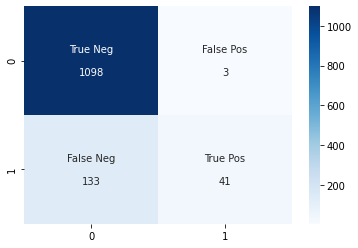

In [ ]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)
y_pred = cross_val_predict(KNN,X_train,y_train,cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
KNN_CV_score = cross_val_score(KNN,X_train,y_train,cv=10)
conf_matrix

array([[2535,   16],
       [ 353,   71]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(KNN_CV_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - KNN: ", KNN_CV_score.mean())
list_accuracy_score.append(KNN_CV_score.mean())
list_model.append("K_Nearest_Neighbours")

[[1098    3]
 [ 142   32]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1101
         1.0       0.91      0.18      0.31       174

    accuracy                           0.89      1275
   macro avg       0.90      0.59      0.62      1275
weighted avg       0.89      0.89      0.85      1275



=== All AUC Scores ===
[0.87919463 0.87248322 0.86577181 0.87919463 0.87919463 0.86868687
 0.87878788 0.87878788 0.87878788 0.87878788]


=== Mean AUC Score ===
Mean AUC Score - KNN:  0.8759677310012879


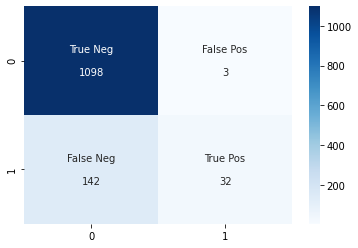

In [ ]:
conf_matrix = cf_matrix
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
y_pred = cross_val_predict(DT,X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
DT_CV_score = cross_val_score(DT,X_train,y_train,cv=20)
conf_matrix

array([[2405,  146],
       [ 126,  298]])

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(DT_CV_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Decision Tree: ", DT_CV_score.mean())
list_accuracy_score.append(DT_CV_score.mean())
list_model.append("Decision Trees")

[[1027   74]
 [  34  140]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1101
         1.0       0.65      0.80      0.72       174

    accuracy                           0.92      1275
   macro avg       0.81      0.87      0.84      1275
weighted avg       0.93      0.92      0.92      1275



=== All AUC Scores ===
[0.91946309 0.90604027 0.91275168 0.90604027 0.91275168 0.88590604
 0.89261745 0.90604027 0.91275168 0.93288591 0.91275168 0.91946309
 0.91946309 0.91275168 0.90604027 0.91216216 0.90540541 0.91216216
 0.89864865 0.90540541]


=== Mean AUC Score ===
Mean AUC Score - Decision Tree:  0.9095750952294578


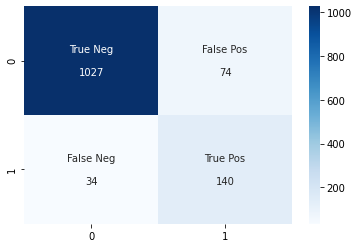

In [ ]:
conf_matrix = cf_matrix
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.naive_bayes import GaussianNB
Naive = GaussianNB()
y_pred = cross_val_predict(Naive,X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
Naive_CV_score = cross_val_score(Naive,X_train,y_train,cv=10)
conf_matrix

array([[2369,  182],
       [ 185,  239]])

In [ ]:
Naive = GaussianNB()
Naive.fit(X_train, y_train)
y_pred = Naive.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(Naive_CV_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Naive Bayes: ", Naive_CV_score.mean())
list_accuracy_score.append(Naive_CV_score.mean())
list_model.append("Naive Bayes")

[[1020   81]
 [  71  103]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1101
         1.0       0.56      0.59      0.58       174

    accuracy                           0.88      1275
   macro avg       0.75      0.76      0.75      1275
weighted avg       0.88      0.88      0.88      1275



=== All AUC Scores ===
[0.87919463 0.87919463 0.86241611 0.89261745 0.87919463 0.86868687
 0.88888889 0.87878788 0.87542088 0.86195286]


=== Mean AUC Score ===
Mean AUC Score - Naive Bayes:  0.8766354823401803


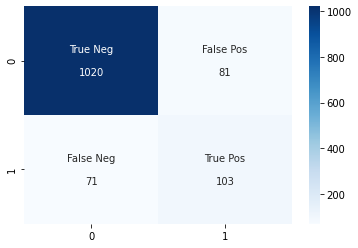

In [ ]:
conf_matrix = cf_matrix
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.svm import SVC
SVM = SVC()
y_pred = cross_val_predict(SVM,X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
SVM_CV_score = cross_val_score(SVM,X_train,y_train,cv=10)
conf_matrix

array([[2531,   20],
       [ 261,  163]])

In [ ]:
SVM = SVC()
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(SVM_CV_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Support Vector Machine: ", SVM_CV_score.mean())
list_accuracy_score.append(SVM_CV_score.mean())
list_model.append("Support Vector Machine")

[[1093    8]
 [  96   78]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1101
         1.0       0.91      0.45      0.60       174

    accuracy                           0.92      1275
   macro avg       0.91      0.72      0.78      1275
weighted avg       0.92      0.92      0.91      1275



=== All AUC Scores ===
[0.89597315 0.89597315 0.89597315 0.91275168 0.90604027 0.91582492
 0.91582492 0.90909091 0.90572391 0.9023569 ]


=== Mean AUC Score ===
Mean AUC Score - Support Vector Machine:  0.9055532958217523


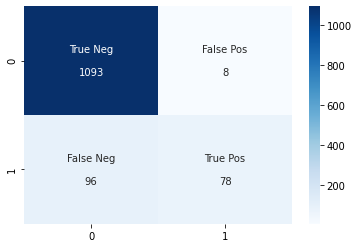

In [ ]:
conf_matrix = cf_matrix
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
y_pred = cross_val_predict(LDA,X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
LDA_CV_score = cross_val_score(LDA,X_train,y_train,cv=10)
conf_matrix

array([[2453,   98],
       [ 306,  118]])

In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(LDA_CV_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Linear Discrimainat Analysis: ", LDA_CV_score.mean())
list_accuracy_score.append(LDA_CV_score.mean())
list_model.append("Linear Discrimainat Analysis")

[[1048   53]
 [ 119   55]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      1101
         1.0       0.51      0.32      0.39       174

    accuracy                           0.87      1275
   macro avg       0.70      0.63      0.66      1275
weighted avg       0.84      0.87      0.85      1275



=== All AUC Scores ===
[0.86241611 0.86241611 0.84228188 0.88255034 0.86912752 0.85858586
 0.86868687 0.89225589 0.84511785 0.85858586]


=== Mean AUC Score ===
Mean AUC Score - Linear Discrimainat Analysis:  0.8642024269541049


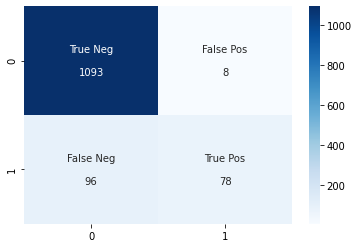

In [ ]:
conf_matrix = cf_matrix
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
import xgboost as xgb

In [ ]:
Model=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
y_pred = cross_val_predict(Model,X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
XGB_CV_score = cross_val_score(Model,X_train,y_train,cv=10)
conf_matrix

array([[2533,   18],
       [ 116,  308]])

In [ ]:
Model=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(XGB_CV_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - XGboost: ", XGB_CV_score.mean())
list_accuracy_score.append(XGB_CV_score.mean())
list_model.append("XGboost")

[[1088   13]
 [  36  138]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1101
         1.0       0.91      0.79      0.85       174

    accuracy                           0.96      1275
   macro avg       0.94      0.89      0.91      1275
weighted avg       0.96      0.96      0.96      1275



=== All AUC Scores ===
[0.96979866 0.95302013 0.96308725 0.95302013 0.94630872 0.94949495
 0.93939394 0.98316498 0.94612795 0.94612795]


=== Mean AUC Score ===
Mean AUC Score - XGboost:  0.9549544663638624


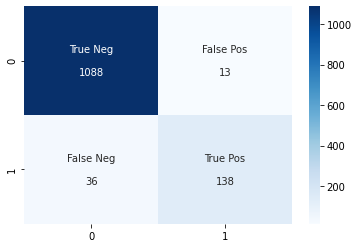

In [ ]:
conf_matrix = cf_matrix
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Model=  GradientBoostingClassifier(n_estimators=100)
y_pred = cross_val_predict(Model,X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
GB_CV_score = cross_val_score(Model,X_train,y_train,cv=10)
conf_matrix

array([[2523,   28],
       [ 114,  310]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Model = GradientBoostingClassifier(n_estimators=100)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(GB_CV_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - GradientBoost: ", GB_CV_score.mean())
list_accuracy_score.append(GB_CV_score.mean())
list_model.append("GradientBoost")

[[1087   14]
 [  35  139]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1101
         1.0       0.91      0.80      0.85       174

    accuracy                           0.96      1275
   macro avg       0.94      0.89      0.91      1275
weighted avg       0.96      0.96      0.96      1275



=== All AUC Scores ===
[0.96979866 0.94966443 0.95302013 0.94966443 0.94630872 0.94276094
 0.93602694 0.98316498 0.94949495 0.94612795]


=== Mean AUC Score ===
Mean AUC Score - GradientBoost:  0.9526032133414685


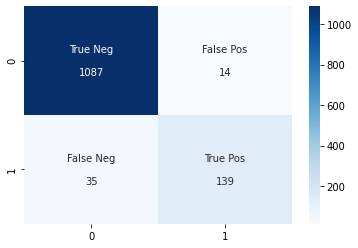

In [ ]:
conf_matrix = cf_matrix
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Model = AdaBoostClassifier(n_estimators=100)
y_pred = cross_val_predict(Model,X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
AdaBoost_CV_score = cross_val_score(Model,X_train,y_train,cv=10)
conf_matrix

array([[2456,   95],
       [ 249,  175]])

In [ ]:
Model = AdaBoostClassifier(n_estimators=100)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(AdaBoost_CV_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - AdaBoost: ", AdaBoost_CV_score.mean())
list_accuracy_score.append(AdaBoost_CV_score.mean())
list_model.append("AdaBoost")

[[1059   42]
 [  96   78]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1101
         1.0       0.65      0.45      0.53       174

    accuracy                           0.89      1275
   macro avg       0.78      0.71      0.73      1275
weighted avg       0.88      0.89      0.88      1275



=== All AUC Scores ===
[0.88926174 0.87248322 0.88255034 0.87583893 0.87919463 0.88888889
 0.90572391 0.8956229  0.87542088 0.87878788]


=== Mean AUC Score ===
Mean AUC Score - AdaBoost:  0.8843773303504847


# Hyperparameter tuning

In [ ]:
# C_vals is the alpla value of lasso and ridge regression(as 
# alpha increases the model complexity decreases,)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']

## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'C': C_vals}

logreg = LogisticRegression()
## Calling on GridSearchCV object. 
grid = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid = param,
    scoring = 'accuracy',
    n_jobs =-1,
    cv = cv
)
## Fitting the model
grid.fit(final_trainx,final_trainy)

KeyboardInterrupt: ignored

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
logreg_grid = grid.best_estimator_

In [ ]:
y_pred = cross_val_predict(logreg_grid,X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
logis_cv_score = cross_val_score(logreg_grid,X_train,y_train,cv=10)


In [ ]:
reg = logreg_grid
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("=== Confusion Matrix ===")
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(logis_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Logistic_Regression: ", logis_cv_score.mean())

In [ ]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(final_trainx,final_trainy)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,final_trainx,final_trainy,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,final_trainx,final_trainy_feature,cv=10)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
from sklearn.model_selection import KFold
model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }
kfold = KFold(n_splits=10)
modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(final_trainx,final_trainy)

# Best score
modelf.best_score_

# Best Estimator
modelf.best_estimator_

#Evaluated model

In [ ]:
y_data = list_accuracy_score
x_data = list_model

In [ ]:
pd.DataFrame({"Accuracy":list_accuracy_score,"Model":list_model})

,Accuracy,Model
0,0.869245,Logistic_Regression
1,0.890084,Random_Forest_Classifier
2,0.875968,K_Nearest_Neighbours
3,0.909575,Decision Trees
4,0.876635,Naive Bayes
5,0.905553,Support Vector Machine
6,0.864202,Linear Discrimainat Analysis
7,0.954954,XGboost
8,0.952603,GradientBoost
9,0.884377,AdaBoost


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
from sklearn.model_selection import KFold
Model=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
kfold = KFold(n_splits=5)
modelf = GridSearchCV(Model,param_grid = params, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(final_trainx,final_trainy)

# Best score
modelf.best_score_

# Best Estimator
modelf.best_estimator_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   28.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 10.0min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 16.6min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 25.5min
[Parallel(n_jobs=4)]: Done 2025 out of 2025 | elapsed: 29.5min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

#Testing

In [ ]:
GB = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=150, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Model =  GB
y_pred = cross_val_predict(Model,X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
GB_CV_score = cross_val_score(Model,X_train,y_train,cv=10)
conf_matrix


array([[2513,   39],
       [ 124,  299]])

In [ ]:
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(GB_CV_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - GradientBoost: ", GB_CV_score.mean())


[[1087   13]
 [  52  123]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1100
         1.0       0.90      0.70      0.79       175

    accuracy                           0.95      1275
   macro avg       0.93      0.85      0.88      1275
weighted avg       0.95      0.95      0.95      1275



=== All AUC Scores ===
[0.94966443 0.91946309 0.94966443 0.94630872 0.93288591 0.96969697
 0.93602694 0.94949495 0.95959596 0.95622896]


=== Mean AUC Score ===
Mean AUC Score - GradientBoost:  0.9469030348224979


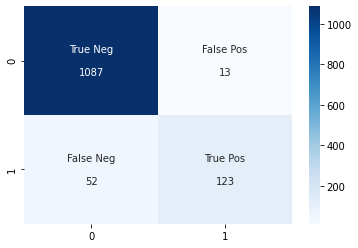

In [ ]:
conf_matrix = cf_matrix
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
XGB = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
y_pred = cross_val_predict(XGB,X_train,y_train, cv=10)
conf_matrix = confusion_matrix(y_train, y_pred)
XGB_CV_score = cross_val_score(XGB,X_train,y_train,cv=10)
conf_matrix

array([[2531,   21],
       [ 101,  322]])

In [ ]:
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(XGB_CV_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - XGBoost: ", XGB_CV_score.mean())

[[1092    8]
 [  42  133]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1100
         1.0       0.94      0.76      0.84       175

    accuracy                           0.96      1275
   macro avg       0.95      0.88      0.91      1275
weighted avg       0.96      0.96      0.96      1275



=== All AUC Scores ===
[0.94295302 0.9295302  0.97315436 0.94630872 0.95973154 0.96632997
 0.93602694 0.95959596 0.95959596 0.95622896]


=== Mean AUC Score ===
Mean AUC Score - XGBoost:  0.9529455630126773


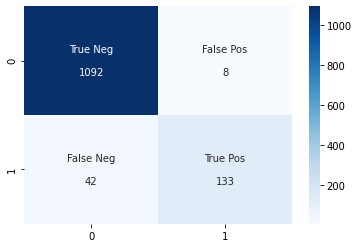

In [ ]:
conf_matrix = cf_matrix
labels = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
model1 = XGB
model2 = GB

In [ ]:
test_data = pd.read_csv("test.csv")

In [ ]:
test_data

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
test_data.drop("id",axis=1,inplace=True)

In [ ]:
test_data.loc[test_data["international_plan"] == "no","international_plan"] = 0
test_data.loc[test_data["international_plan"] == "yes","international_plan"] = 1



In [ ]:
test_data.loc[test_data["voice_mail_plan"] == "no","voice_mail_plan"] = 0
test_data.loc[test_data["voice_mail_plan"] == "yes","voice_mail_plan"] = 1


In [ ]:
X1 = test_data[["area_code"]]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X1)
enc.categories_
j = enc.transform(X1).toarray()

In [ ]:
df1 = pd.DataFrame(j,columns=['area_code_408', 'area_code_415', 'area_code_510'])
train1 = pd.concat([test_data,df1],axis=1)
train1.drop("area_code",axis=1,inplace=True)

In [ ]:
test_data["account_length_year"] = round(test_data["account_length"]/12,2)

In [ ]:
X1 = test_data[["area_code"]]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X1)
enc.categories_
j = enc.transform(X1).toarray()
df1 = pd.DataFrame(j,columns=['area_code_408', 'area_code_415', 'area_code_510'])
train1 = pd.concat([test_data,df1],axis=1)
train1.drop("area_code",axis=1,inplace=True)

In [ ]:
train1.drop("id",axis=1,inplace=True)

KeyError: ignored

In [ ]:
data_transform = train1[list_col]

In [ ]:
train1.drop("state",axis=1,inplace=True)

In [ ]:
train1.drop("account_length",axis=1,inplace=True)

In [ ]:
train1

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length_year,area_code_408,area_code_415,area_code_510
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,10.67,0.0,1.0,0.0
1,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,9.83,0.0,0.0,1.0
2,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,5.17,0.0,1.0,0.0
3,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,7.75,0.0,0.0,1.0
4,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,14.50,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,10.83,0.0,1.0,0.0
746,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,6.08,1.0,0.0,0.0
747,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,12.67,0.0,1.0,0.0
748,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,5.08,0.0,1.0,0.0


In [ ]:
data_transform = train1[list_col]

In [ ]:
data_transform

,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...
745,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
train1["account_length"] = (train1["account_length_year"] -train1.account_length_year.mean())/train1.account_length_year.std()

In [ ]:
train1

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,account_length_year,area_code_408,area_code_415,area_code_510,account_length
0,0,1,0.490196,1.589330,10.67,0.0,1.0,0.0,0.696660
1,1,0,0.000000,0.806354,9.83,0.0,0.0,1.0,0.442751
2,0,0,0.000000,-1.121983,5.17,0.0,1.0,0.0,-0.965835
3,0,0,0.000000,0.192366,7.75,0.0,0.0,1.0,-0.185974
4,0,0,0.000000,-1.054388,14.50,0.0,1.0,0.0,1.854360
...,...,...,...,...,...,...,...,...,...
745,0,0,0.000000,-1.146392,10.83,0.0,1.0,0.0,0.745023
746,0,0,0.000000,-0.061116,6.08,1.0,0.0,0.0,-0.690767
747,0,0,0.000000,0.070319,12.67,0.0,1.0,0.0,1.301203
748,0,0,0.000000,-0.748332,5.08,0.0,1.0,0.0,-0.993039


In [ ]:
train1["number_vmail_messages"] = train1["number_vmail_messages"]/train1.number_vmail_messages.max()

In [ ]:
train1

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,account_length_year,area_code_408,area_code_415,area_code_510,account_length
0,0,1,0.490196,1.589330,10.67,0.0,1.0,0.0,0.696660
1,1,0,0.000000,0.806354,9.83,0.0,0.0,1.0,0.442751
2,0,0,0.000000,-1.121983,5.17,0.0,1.0,0.0,-0.965835
3,0,0,0.000000,0.192366,7.75,0.0,0.0,1.0,-0.185974
4,0,0,0.000000,-1.054388,14.50,0.0,1.0,0.0,1.854360
...,...,...,...,...,...,...,...,...,...
745,0,0,0.000000,-1.146392,10.83,0.0,1.0,0.0,0.745023
746,0,0,0.000000,-0.061116,6.08,1.0,0.0,0.0,-0.690767
747,0,0,0.000000,0.070319,12.67,0.0,1.0,0.0,1.301203
748,0,0,0.000000,-0.748332,5.08,0.0,1.0,0.0,-0.993039


In [ ]:
data_transform = (data_transform- data_transform.mean())/data_transform.std()

In [ ]:
train1.drop(columns=data_transform.columns,inplace=True)

KeyError: ignored

In [ ]:
data_transform

,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.470555,1.589625,-0.112259,-0.065746,-0.112065,0.874818,-0.488431,0.874189,-0.106172,-0.613292,-0.106905,-0.497307
1,-0.138009,0.806525,0.332310,0.037520,0.332065,0.083067,0.918901,0.085028,-1.441748,0.625404,-1.444333,-1.280879
2,-1.557992,-1.121956,1.991775,-1.253300,1.991353,0.065601,-0.071444,0.067779,1.012824,0.625404,1.016535,1.853409
3,0.673410,0.192415,0.286320,0.553848,0.286976,-1.358774,1.075271,-1.359610,-0.792009,-0.613292,-0.788994,1.069837
4,-1.253710,-1.054581,1.414986,0.605481,1.414209,0.991252,0.762531,0.990622,1.879143,0.212505,1.885863,1.069837
...,...,...,...,...,...,...,...,...,...,...,...,...
745,-0.087295,-1.146256,0.441535,-0.169011,0.442534,0.059780,0.554037,0.059154,0.363084,1.038303,0.361195,-1.280879
746,0.876265,-0.061623,1.288514,-0.840238,1.287959,0.818541,0.606160,0.818128,0.724051,-1.026191,0.722300,1.069837
747,-0.543718,0.069814,1.025989,-1.408198,1.026441,0.271302,0.658284,0.270459,1.590370,-1.026191,1.591629,1.069837
748,-0.594432,-0.748631,-0.583654,1.431605,-0.583249,0.248015,-0.175691,0.248897,1.193307,-0.200394,1.190400,-0.497307


In [ ]:
train1["total_day_minutes"] = (train1["total_day_minutes"]-train1["total_day_minutes"].mean())/train1["total_day_minutes"].std()

In [ ]:
train1

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,account_length_year,area_code_408,area_code_415,area_code_510,account_length
0,0,1,0.490196,1.589330,10.67,0.0,1.0,0.0,0.696660
1,1,0,0.000000,0.806354,9.83,0.0,0.0,1.0,0.442751
2,0,0,0.000000,-1.121983,5.17,0.0,1.0,0.0,-0.965835
3,0,0,0.000000,0.192366,7.75,0.0,0.0,1.0,-0.185974
4,0,0,0.000000,-1.054388,14.50,0.0,1.0,0.0,1.854360
...,...,...,...,...,...,...,...,...,...
745,0,0,0.000000,-1.146392,10.83,0.0,1.0,0.0,0.745023
746,0,0,0.000000,-0.061116,6.08,1.0,0.0,0.0,-0.690767
747,0,0,0.000000,0.070319,12.67,0.0,1.0,0.0,1.301203
748,0,0,0.000000,-0.748332,5.08,0.0,1.0,0.0,-0.993039


In [ ]:
train1

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,account_length_year,area_code_408,area_code_415,area_code_510,account_length
0,0,1,0.490196,1.589330,10.67,0.0,1.0,0.0,0.696660
1,1,0,0.000000,0.806354,9.83,0.0,0.0,1.0,0.442751
2,0,0,0.000000,-1.121983,5.17,0.0,1.0,0.0,-0.965835
3,0,0,0.000000,0.192366,7.75,0.0,0.0,1.0,-0.185974
4,0,0,0.000000,-1.054388,14.50,0.0,1.0,0.0,1.854360
...,...,...,...,...,...,...,...,...,...
745,0,0,0.000000,-1.146392,10.83,0.0,1.0,0.0,0.745023
746,0,0,0.000000,-0.061116,6.08,1.0,0.0,0.0,-0.690767
747,0,0,0.000000,0.070319,12.67,0.0,1.0,0.0,1.301203
748,0,0,0.000000,-0.748332,5.08,0.0,1.0,0.0,-0.993039


In [ ]:
test_data = pd.concat([train1,data_transform],axis=1)

In [ ]:
test_data["state"] = pd.read_csv("test.csv")["state"]

In [ ]:
test_data.drop("account_length_year",axis=1,inplace=True)

In [ ]:
A = test_data.columns
B = final_trainx.columns
for i in B:
  if i not in A:
    print(i)

state_by_dangerous


In [ ]:
test_data

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,area_code_408,area_code_415,area_code_510,account_length,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state
0,0,1,0.490196,1.589330,0.0,1.0,0.0,0.696660,0.470555,1.589625,-0.112259,-0.065746,-0.112065,0.874818,-0.488431,0.874189,-0.106172,-0.613292,-0.106905,-0.497307,KS
1,1,0,0.000000,0.806354,0.0,0.0,1.0,0.442751,-0.138009,0.806525,0.332310,0.037520,0.332065,0.083067,0.918901,0.085028,-1.441748,0.625404,-1.444333,-1.280879,AL
2,0,0,0.000000,-1.121983,0.0,1.0,0.0,-0.965835,-1.557992,-1.121956,1.991775,-1.253300,1.991353,0.065601,-0.071444,0.067779,1.012824,0.625404,1.016535,1.853409,IA
3,0,0,0.000000,0.192366,0.0,0.0,1.0,-0.185974,0.673410,0.192415,0.286320,0.553848,0.286976,-1.358774,1.075271,-1.359610,-0.792009,-0.613292,-0.788994,1.069837,VT
4,0,0,0.000000,-1.054388,0.0,1.0,0.0,1.854360,-1.253710,-1.054581,1.414986,0.605481,1.414209,0.991252,0.762531,0.990622,1.879143,0.212505,1.885863,1.069837,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0.000000,-1.146392,0.0,1.0,0.0,0.745023,-0.087295,-1.146256,0.441535,-0.169011,0.442534,0.059780,0.554037,0.059154,0.363084,1.038303,0.361195,-1.280879,GA
746,0,0,0.000000,-0.061116,1.0,0.0,0.0,-0.690767,0.876265,-0.061623,1.288514,-0.840238,1.287959,0.818541,0.606160,0.818128,0.724051,-1.026191,0.722300,1.069837,WA
747,0,0,0.000000,0.070319,0.0,1.0,0.0,1.301203,-0.543718,0.069814,1.025989,-1.408198,1.026441,0.271302,0.658284,0.270459,1.590370,-1.026191,1.591629,1.069837,WV
748,0,0,0.000000,-0.748332,0.0,1.0,0.0,-0.993039,-0.594432,-0.748631,-0.583654,1.431605,-0.583249,0.248015,-0.175691,0.248897,1.193307,-0.200394,1.190400,-0.497307,DC


In [ ]:
dict_churn_dangerous = {5:["NJ","CA","WA","MD","MT","OK","NV"],4:["SC","TX","MS","ME","MN","MI","KS","CT","NY","DE"],
                        3:["MA","IN","AR","TN","OR","SD","KY"],2:["WV","AL","NH","NM","OH","MO","UT","PA","FL","VT","ID","IA","CO",
                        "DC","GA","WY","LA"],1:["AZ","ND","NC","IL","WI"],0:["RI","NE","AK","HI","VA"]}
list1 = []
for i in range(test_data.shape[0]):
  c = False
  for k in range(6):
    b = test_data.iloc[i,20]
    if b in dict_churn_dangerous[k]:
      list1.append(k)
      c = True
test_data["state_by_dangerous"] = list1

In [ ]:
test_data.drop("state",axis=1,inplace=True)

In [ ]:
final_trainx

,account_length,international_plan,voice_mail_plan,total_day_minutes,area_code_408,area_code_415,area_code_510,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_by_dangerous,number_vmail_messages
0,0.170379,0.0,1.0,-0.345469,0.0,1.0,0.0,1.163313,-0.345747,-0.093014,0.141825,-0.092482,1.069877,0.157290,1.070694,1.247755,-0.579096,1.248444,-0.426296,2,0.500000
1,0.926077,0.0,0.0,1.168999,0.0,1.0,0.0,0.709931,1.169158,-1.571635,0.493432,-1.572156,-0.753232,0.207058,-0.751964,0.704296,0.232899,0.698260,-1.188820,5,0.000000
2,-0.408990,1.0,0.0,2.205798,1.0,0.0,0.0,-1.456227,2.205958,-2.751746,-0.611619,-2.752149,-0.072048,-0.539462,-0.072329,-1.324614,1.044894,-1.328031,0.336228,2,0.000000
3,-0.635699,1.0,0.0,-0.251046,0.0,1.0,0.0,0.659555,-0.250997,-1.032326,1.096187,-1.031326,-0.270644,1.053115,-0.270924,-0.056545,-0.579096,-0.053212,1.098753,5,0.000000
4,0.523038,0.0,1.0,0.702439,0.0,0.0,1.0,-0.599839,0.701944,2.951791,0.392973,2.951150,0.239747,0.903811,0.241009,-0.998539,1.044894,-0.992552,1.098753,3,0.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.434180,0.0,0.0,0.148862,0.0,1.0,0.0,-1.506603,0.148693,0.868189,-0.611619,0.867433,0.261593,-1.037142,0.263075,0.015916,0.638897,0.013883,-1.188820,5,0.000000
4246,-0.686079,0.0,0.0,-0.043686,1.0,0.0,0.0,-0.549463,-0.044073,-1.372628,-0.912996,-1.373149,-0.284546,-0.539462,-0.284163,0.450682,0.638897,0.456715,1.098753,2,0.000000
4247,-0.635699,0.0,0.0,-0.176989,1.0,0.0,0.0,0.055046,-0.176940,-0.140776,1.297105,-0.141649,-1.418527,0.207058,-1.418360,-1.215923,1.044894,-1.220678,-0.426296,1,0.000000
4248,-1.265447,0.0,1.0,1.026439,1.0,0.0,0.0,1.364816,1.026489,0.454255,1.297105,0.455372,1.925825,0.804275,1.926857,-0.129006,0.232899,-0.133727,0.336228,0,0.769231


In [ ]:
model1 = XGB
model2 = GB

In [ ]:
model1.fit(final_trainx,final_trainy)
model2.fit(final_trainx,final_trainy)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=150, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
test_data1 = test_data.astype({"international_plan":float,"voice_mail_plan":float})

In [ ]:
test_data1

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,area_code_408,area_code_415,area_code_510,account_length,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_by_dangerous
0,0.0,1.0,0.490196,1.589330,0.0,1.0,0.0,0.696660,0.470555,1.589625,-0.112259,-0.065746,-0.112065,0.874818,-0.488431,0.874189,-0.106172,-0.613292,-0.106905,-0.497307,4
1,1.0,0.0,0.000000,0.806354,0.0,0.0,1.0,0.442751,-0.138009,0.806525,0.332310,0.037520,0.332065,0.083067,0.918901,0.085028,-1.441748,0.625404,-1.444333,-1.280879,2
2,0.0,0.0,0.000000,-1.121983,0.0,1.0,0.0,-0.965835,-1.557992,-1.121956,1.991775,-1.253300,1.991353,0.065601,-0.071444,0.067779,1.012824,0.625404,1.016535,1.853409,2
3,0.0,0.0,0.000000,0.192366,0.0,0.0,1.0,-0.185974,0.673410,0.192415,0.286320,0.553848,0.286976,-1.358774,1.075271,-1.359610,-0.792009,-0.613292,-0.788994,1.069837,2
4,0.0,0.0,0.000000,-1.054388,0.0,1.0,0.0,1.854360,-1.253710,-1.054581,1.414986,0.605481,1.414209,0.991252,0.762531,0.990622,1.879143,0.212505,1.885863,1.069837,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.000000,-1.146392,0.0,1.0,0.0,0.745023,-0.087295,-1.146256,0.441535,-0.169011,0.442534,0.059780,0.554037,0.059154,0.363084,1.038303,0.361195,-1.280879,2
746,0.0,0.0,0.000000,-0.061116,1.0,0.0,0.0,-0.690767,0.876265,-0.061623,1.288514,-0.840238,1.287959,0.818541,0.606160,0.818128,0.724051,-1.026191,0.722300,1.069837,5
747,0.0,0.0,0.000000,0.070319,0.0,1.0,0.0,1.301203,-0.543718,0.069814,1.025989,-1.408198,1.026441,0.271302,0.658284,0.270459,1.590370,-1.026191,1.591629,1.069837,2
748,0.0,0.0,0.000000,-0.748332,0.0,1.0,0.0,-0.993039,-0.594432,-0.748631,-0.583654,1.431605,-0.583249,0.248015,-0.175691,0.248897,1.193307,-0.200394,1.190400,-0.497307,2


In [ ]:
test_data1.columns == final_trainx.columns

array([False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
columns_name = final_trainx.columns

In [ ]:
final_test = test_data1.reindex(columns=columns_name)

In [ ]:
final_test.columns == final_trainx.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
model1 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
model1.fit(final_trainx,final_trainy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_pred2 = model2.predict(final_test)

In [ ]:
y_pred1 = model1.predict(final_test)

In [ ]:
y_pred2

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_pred1

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [ ]:
 pd.read_csv("sampleSubmission.csv")

,id,churn
0,1,yes
1,2,no
2,3,no
3,4,yes
4,5,yes
...,...,...
745,746,yes
746,747,yes
747,748,no
748,749,yes


In [ ]:
submission1 = pd.read_csv("sampleSubmission.csv")

In [ ]:
submission2 = pd.read_csv("sampleSubmission.csv")

In [ ]:
submission1["churn"] = y_pred1

In [ ]:
submission2["churn"] = y_pred2

In [ ]:
submission1.loc[submission1["churn"]==0,"churn"] = "no"
submission1.loc[submission1["churn"]==1,"churn"] = "yes"

In [ ]:
submission2.loc[submission2["churn"]==0,"churn"] = "no"
submission2.loc[submission2["churn"]==1,"churn"] = "yes"

In [ ]:
submission2

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [ ]:
submission1.to_csv('churn1.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
submission2.to_csv("churn2.csv",index=False)

# Dive Deep to EDA

In [ ]:
columns = final_test.columns
columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'total_day_minutes', 'area_code_408', 'area_code_415', 'area_code_510',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_by_dangerous',
       'number_vmail_messages'],
      dtype='object')

In [ ]:
LGB = model1.feature_importances_

In [ ]:
GB = model2.feature_importances_

In [ ]:
feature_important = pd.DataFrame({"columns":columns,
    "LGB_important":LGB,
    "GB_important":GB
})

In [ ]:
feature_important

,columns,LGB_important,GB_important
0,account_length,0.015484,0.009630
1,international_plan,0.100910,0.134580
2,voice_mail_plan,0.065639,0.013746
3,total_day_minutes,0.081743,0.174404
4,area_code_408,0.029631,0.000573
5,area_code_415,0.024447,0.001129
6,area_code_510,0.012585,0.000351
7,total_day_calls,0.023296,0.007611
8,total_day_charge,0.071425,0.234401
9,total_eve_minutes,0.047318,0.044053


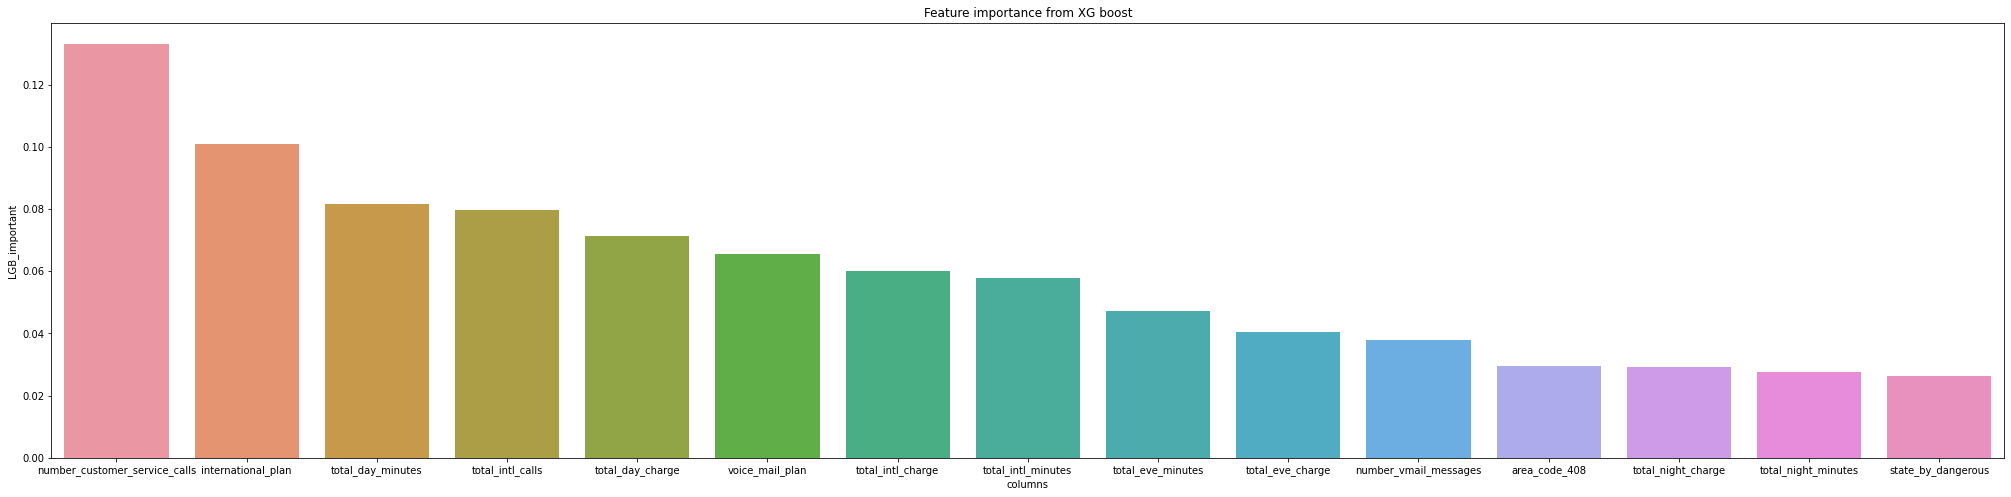

In [ ]:
plt.figure(figsize=(35,8))
sns.barplot(x="columns",y="LGB_important",data=feature_important.sort_values('LGB_important',ascending = False)[:15])
plt.title("Feature importance from XG boost")
plt.show()

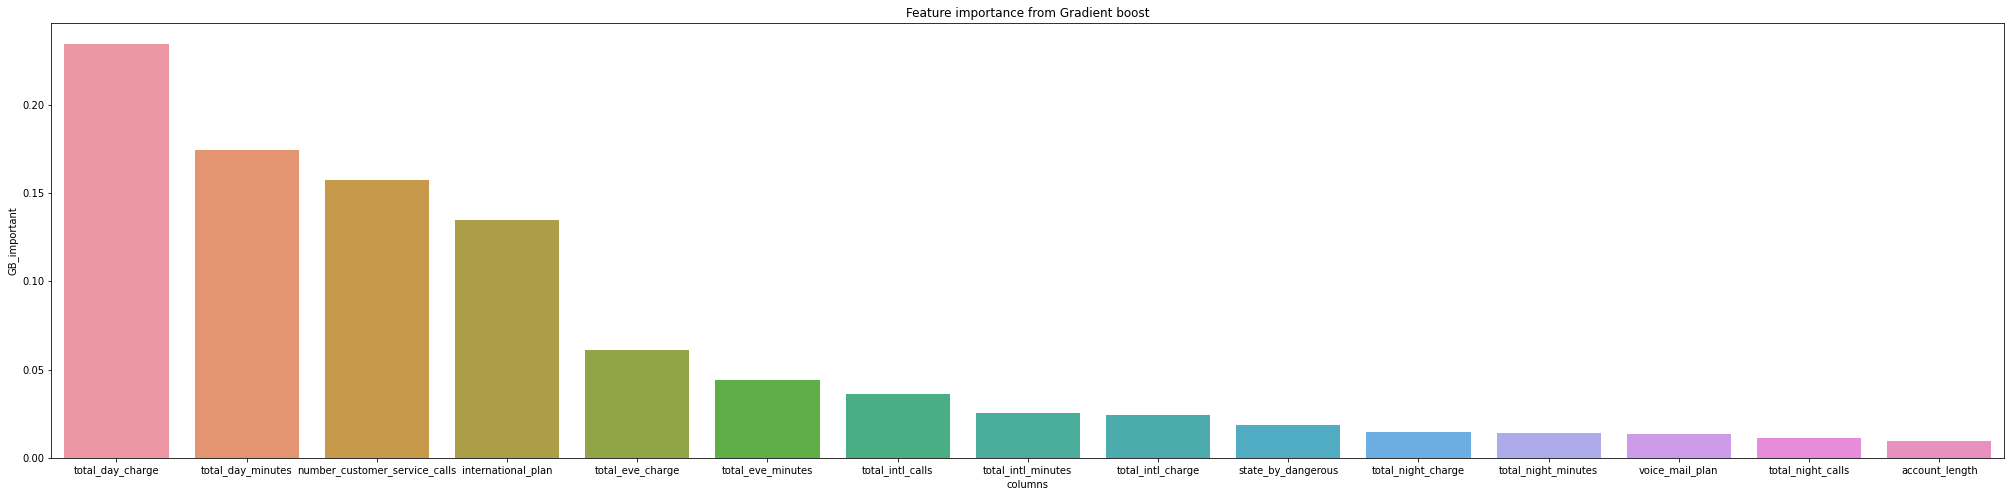

In [ ]:
plt.figure(figsize=(35,8))
sns.barplot(x="columns",y="GB_important",data=feature_important.sort_values("GB_important",ascending = False)[:15])
plt.title("Feature importance from Gradient boost")
plt.show()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,account_length_year,area_code_408,area_code_415,area_code_510,account_length
0,0,1,0.490196,1.589330,10.67,0.0,1.0,0.0,0.696660
1,1,0,0.000000,0.806354,9.83,0.0,0.0,1.0,0.442751
2,0,0,0.000000,-1.121983,5.17,0.0,1.0,0.0,-0.965835
3,0,0,0.000000,0.192366,7.75,0.0,0.0,1.0,-0.185974
4,0,0,0.000000,-1.054388,14.50,0.0,1.0,0.0,1.854360
...,...,...,...,...,...,...,...,...,...
745,0,0,0.000000,-1.146392,10.83,0.0,1.0,0.0,0.745023
746,0,0,0.000000,-0.061116,6.08,1.0,0.0,0.0,-0.690767
747,0,0,0.000000,0.070319,12.67,0.0,1.0,0.0,1.301203
748,0,0,0.000000,-0.748332,5.08,0.0,1.0,0.0,-0.993039
